# <center> Zestaw 3
## <center> Ryszard Pręcikowski
### <center> 401433

In [1]:
from sympy import *
import numpy as np
import scipy.interpolate as scinter
import matplotlib.pyplot as plt
from random import uniform

# zadanie 1


### Wykres funkcji $f(x) = \frac{1}{1+25x^2}$

In [2]:
x = Symbol('x')

f = 1/ (1 + 25 * x ** 2)

f

1/(25*x**2 + 1)

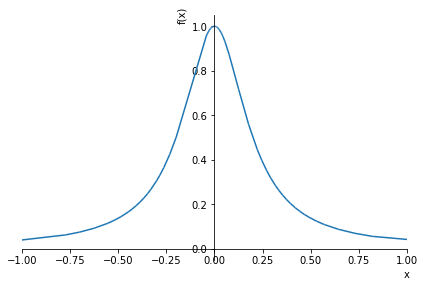

In [3]:
p0 = plot(f, xlim = (-1,1))

### obliczenie pochodnych

In [4]:
der5 = f.diff(x, 5)
der10 = f.diff(x, 10)
der15 = f.diff(x, 15)

### pochodna 5tego rzędu

In [5]:
der5

3750000*x*(-10000*x**4/(25*x**2 + 1)**2 + 400*x**2/(25*x**2 + 1) - 3)/(25*x**2 + 1)**4

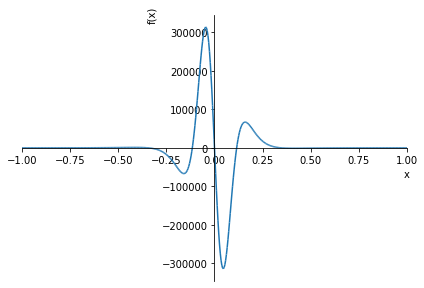

In [6]:
p5 = plot(der5, xlim = (-1,1), adaptive = False, nb_of_points = 5000)

### pochodna 10tego rzędu

In [7]:
der10

35437500000000*(10000000000*x**10/(25*x**2 + 1)**5 - 900000000*x**8/(25*x**2 + 1)**4 + 28000000*x**6/(25*x**2 + 1)**3 - 350000*x**4/(25*x**2 + 1)**2 + 1500*x**2/(25*x**2 + 1) - 1)/(25*x**2 + 1)**6

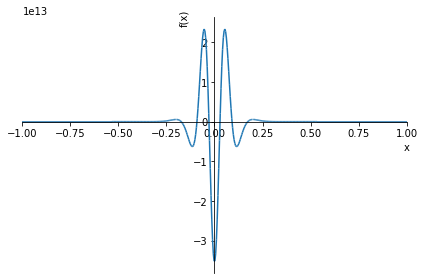

In [8]:
p10 = plot(der10, xlim = (-1,1), adaptive = False, nb_of_points = 5000)

### pochodna 15tego rzędu

In [9]:
der15

3192564375000000000000000*x*(-12500000000000*x**14/(25*x**2 + 1)**7 + 1750000000000*x**12/(25*x**2 + 1)**6 - 97500000000*x**10/(25*x**2 + 1)**5 + 2750000000*x**8/(25*x**2 + 1)**4 - 41250000*x**6/(25*x**2 + 1)**3 + 315000*x**4/(25*x**2 + 1)**2 - 1050*x**2/(25*x**2 + 1) + 1)/(25*x**2 + 1)**9

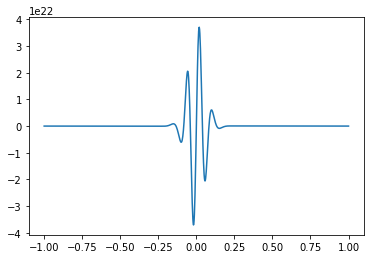

In [10]:
lf = lambdify(x, der15)
d = np.linspace(-1, 1, num = 1000)
plt.plot(d, lf(d))

plt.show()

## Interpolacja

In [11]:
def get_Chebyshev_nodes(n):
    """
    Funkcja zwracająca współrzędne węzłów Czebyszewa
    """
    points = np.zeros(n)
    for i in range(n):
        points[i] = cos((2*i + 1)/(2*(n+0)) * pi)

    return points

In [12]:
def Newton_interpolation(f, n):
    lf = lambdify(x, f)

    points = np.linspace(-1, 1, num= n)
    f_interpolated = scinter.KroghInterpolator(points, lf(points))

    return f_interpolated, points

def Chebyshev_node_interpolation(f, n):
    lf = lambdify(x, f)

    points = get_Chebyshev_nodes(n)

    f_interpolated = scinter.KroghInterpolator(points, lf(points))

    return f_interpolated, points

def clamped_cubic_spline_interpolation(f, n):
    lf = lambdify(x, f)

    points = np.linspace(-1, 1, num= n, dtype= float)

    f_interpolated = scinter.CubicSpline(points, lf(points))

    return f_interpolated, points


def plot_interpolation(f, f_interpolated, points, a = -1, b = 1, title = "Interpolation"):
    lf = lambdify(x, f)
    d = np.linspace(a, b, num = 1000)
    
    plt.plot(d, lf(d), label = "Original function")
    plt.plot(d, f_interpolated(d), label = "Interpolated")
    plt.scatter(points, f_interpolated(points), label = "Nodes")
    plt.title(title)
    plt.legend()
    plt.show()

In [13]:
def error_func(f, interpolated):
    lf = lambdify(x, f)
    return lambda p : abs(lf(p) - interpolated(p))

def plot_error_func(error_func):
    d = np.linspace(-1, 1, num = 1000)

    plt.plot(d, error_func(d))
    plt.title("Error function")
    plt.show()

## Interpolacja za pomocą wielomianów Newtona

### 5tego stopnia

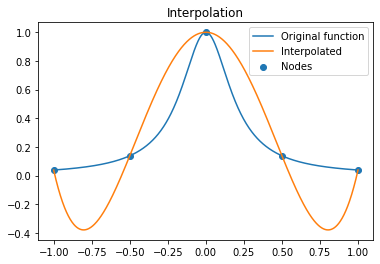

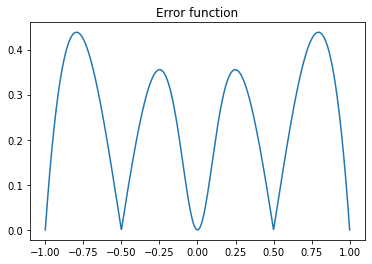

In [14]:
polyNewton5, points5 = Newton_interpolation(f, 5)
plot_interpolation(f, polyNewton5, points5)
plot_error_func(error_func(f,polyNewton5))


### 10tego stopnia

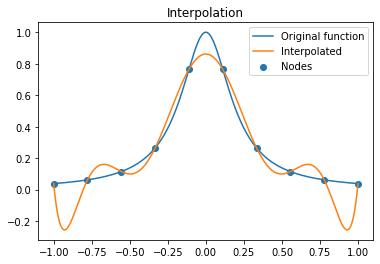

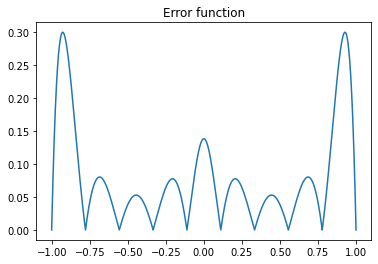

In [15]:
polyNewton10, points10 = Newton_interpolation(f, 10)
plot_interpolation(f, polyNewton10, points10)
plot_error_func(error_func(f,polyNewton10))

## Interpolacja za pomocą węzłów Czebyszewa

### 5tego stopnia

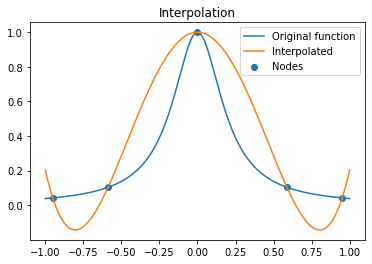

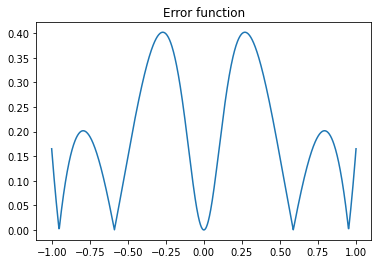

In [16]:
polyChebyshev5, points5 = Chebyshev_node_interpolation(f, 5)
plot_interpolation(f, polyChebyshev5, points5)
plot_error_func(error_func(f,polyChebyshev5))

### 10tego stopnia

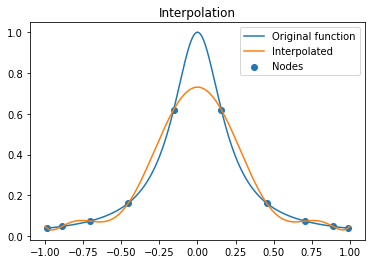

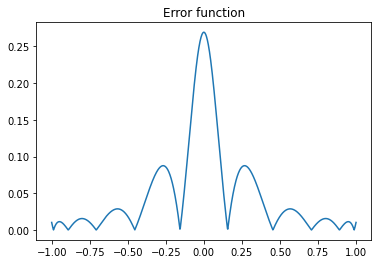

In [17]:
polyChebyshev10, points10 = Chebyshev_node_interpolation(f, 10)
plot_interpolation(f, polyChebyshev10, points10)
plot_error_func(error_func(f,polyChebyshev10))

## Interpolacja kubicznymi funkcjami sklejanymi z 11 równoodległymi węzłami

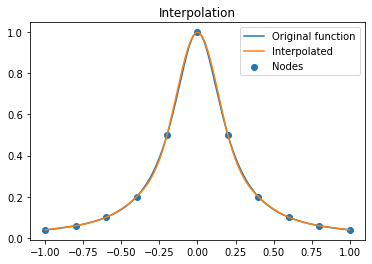

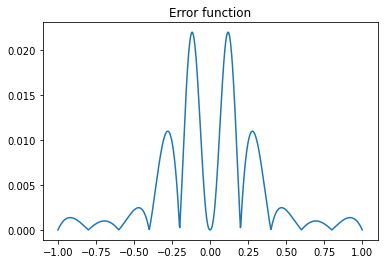

In [18]:
spline, points5 = clamped_cubic_spline_interpolation(f, 11)
plot_interpolation(f, spline, points5)
plot_error_func(error_func(f,spline))

## Wyniki interpolacji i jej błędy dla losowo próbkowanych punktów

In [19]:
test_points = [uniform(-1,1) for _ in range(50)]
test_points.sort()
lf = lambdify(x, f)

Newton_errors = error_func(f, polyNewton10)
Chebyshev_errors = error_func(f, polyChebyshev10)
spline_errors = error_func(f, spline)

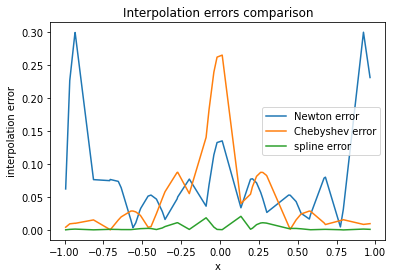

In [20]:
import pandas as pd

df = pd.DataFrame(columns=['x', 'f(x)', 'Newton', 'Chebyshev', 'spline', "Newton error", 'Chebyshev error', 'spline error'])

for i in range(len(test_points)):
    point = test_points[i]

    df.loc[i] = [point, lf(point), polyNewton10(point), polyChebyshev10(point), spline(point),
                 Newton_errors(point), Chebyshev_errors(point), spline_errors(point)]


ax = df.plot(x = 'x', y = ['Newton error', 'Chebyshev error', 'spline error'])
ax.set_ylabel('interpolation error')
ax.set_title('Interpolation errors comparison')
plt.show()

In [21]:
df

,x,f(x),Newton,Chebyshev,spline,Newton error,Chebyshev error,spline error
0,-0.993285,0.038963,-0.02326978209953743,0.04315562179223802,0.03920398976203274,0.062233,0.004193,0.000241
1,-0.966971,0.041024,-0.1854652686130419,0.031693448427695885,0.04196120156109254,0.226490,0.009331,0.000937
2,-0.933453,0.043892,-0.25496548955627907,0.03368084498302149,0.04522608928740529,0.298857,0.010211,0.001334
3,-0.932378,0.043988,-0.25533640847651345,0.03393750471561053,0.0453279790485142,0.299325,0.010051,0.001340
4,-0.814148,0.056912,-0.019438702679803462,0.07217267366570096,0.05713633070488763,0.076351,0.015260,0.000224
5,-0.710600,0.073401,0.14820789536408574,0.07437904650583259,0.07243426207855744,0.074807,0.000978,0.000967
6,-0.706305,0.074230,0.15078043976558073,0.07400343833710339,0.07325013144584469,0.076551,0.000226,0.000980
7,-0.654589,0.085381,0.15905955896283502,0.07026841489307438,0.08456621590453658,0.073678,0.015113,0.000815
8,-0.636017,0.089985,0.15403655663804253,0.07013261690760542,0.08937837780468838,0.064051,0.019853,0.000607
9,-0.573218,0.108525,0.12345136153131468,0.07977853915608231,0.10910911297445516,0.014927,0.028746,0.000584


### Najmniejsze błędy otrzymujemy dla kubicznych funkcji sklejanych.
### Dla węzłów równoodległych największe błędy obserwujemy na krańcach przedziału, natomiast na środku maleją
### Dla węzłów Czebyszewa obserwujemy sytuację odwrotną.

In [22]:
def upper_bound_equidistant(f, n, a = -1, b = 1):
    h = 2/n
    df = f.diff(x, n + 1)
    
    k = max(abs(float(maximum(df, x, Interval(a,b)))), 
            abs(float(minimum(df, x, Interval(a,b)))))
    
    k *= h ** (n+1) / (4*(n+1))
    return float(k)

def upper_bound_Chebyshev(f, n):
    df = f.diff(x, n+1)
    
    k = max(abs(float(maximum(df, x, Interval(-1,1)))), 
            abs(float(minimum(df, x, Interval(-1,1)))))
    
    difference = get_Chebyshev_nodes(n)[0] - get_Chebyshev_nodes(n)[-1]

    k *= 2/factorial(n + 1) * (difference/4)**4

    return float(k)

def upper_bound_spline(f, n):
    df  = f.diff(x, 4)
    
    k = max(abs(float(maximum(df, x, Interval(-1,1)))), 
            abs(float(minimum(df, x, Interval(-1,1)))))
    
    h = 2/n # roznica to h, poniewaz punkty sa rownomiernie

    k *= 5/384 * h ** 4

    max_value = 0
    return float(k)

In [23]:
def get_error(df, name):
    return max(df[name])

In [24]:
upper_bound_Newton = upper_bound_equidistant(f, 10)
upper_bound_Chebyshev = upper_bound_Chebyshev(f, 10)
upper_bound_spline = upper_bound_spline(f, 5)

In [25]:
print("Newton upper bound", upper_bound_Newton, "calculated error", get_error(df, 'Newton error'))
print("Chebyshev upper bound", upper_bound_Chebyshev, "calculated error", get_error(df, 'Chebyshev error'))
print("spline upper bound", upper_bound_spline, "calculated error", get_error(df, 'spline error'))

#błąd jest dla calej funkcji a nie dla punktów

Newton upper bound 824874.3436851762 calculated error 0.29978229794396344
Chebyshev upper bound 5281344.815803049 calculated error 0.2650968170846594
spline upper bound 5.000000000000002 calculated error 0.020708025163832855


### Otrzymane błędy są nieporównywalnie mniejsze w porównaniu do górnego ograniczenia.

# Zadanie 2

### Udowodnij, że w przypadku węzłów równoodległych jeśli $|f^{(n+1)}(x)| \leq M$ dla $x \in [x_0, x_n]$, to błąd interpolacji 
### $$|f(x) - p(x)| \leq \frac1{(n+1)!} \cdot \max_{x_0 \leq t \leq x_n} |f^{(n+1)}(t)|\cdot \prod_{i=0}^n (x-x_i) $$

### jest ograniczony w następujący sposób:
### $$|f(x) - p(x)| \leq \frac{M}{4(n+1)}\cdot h^{n+1}$$
<center>gdzie $ h = \frac{(x_n - x_0)}{n}$</center>

#### łącząc dwie pierwsze nierówności otrzymujemy
### $$|f(x) - p(x)| \leq \frac1{(n+1)!} \cdot M \cdot \prod_{i=0}^n (x-x_i)$$

#### dla równoodległych węzłów prawdziwe jest ograniczenie
### $$\prod_{i=0}^n (x-x_i) \leq \frac14 h^{n+1} n$$ 

#### po połączeniu powyższych nierówności otrzymujemy:
$$\begin{align} 
|f(x) - p(x)| &\leq  \frac1{(n+1)!} \cdot M \cdot \frac14 h^{n+1} n! \\
&= \frac{n!}{(n+1)!}\cdot\frac14 \cdot M \cdot h^{n+1} \\
&= \frac{M}{4(n+1)}\cdot h^{n+1} 
\end{align}           $$

# zadanie 3

### Interpolacja funkcji $f(x) = |sin(x)|$ w przedziale $[-4,4]$ przy użyciu wielomianów Lagrange'a dla równoodległych węzłów interpolacji.

In [26]:
def Lagrange_interpolation(f, n, a = -4, b = 4):
    points = np.linspace(a, b, n)

    lf = lambdify(x, f)
    inter = scinter.lagrange(points, lf(points))

    return inter

f = abs(sin(x))

### wielomiany 2-go stopnia

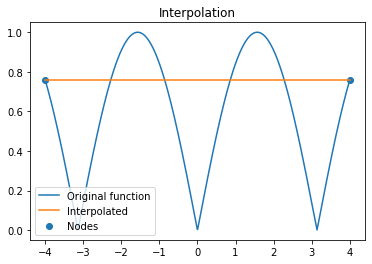

In [27]:
n = 2
inter = Lagrange_interpolation(f, n)
plot_interpolation(f, inter, np.linspace(-4, 4, n), -4, 4)

### wielomiany 5-go stopnia

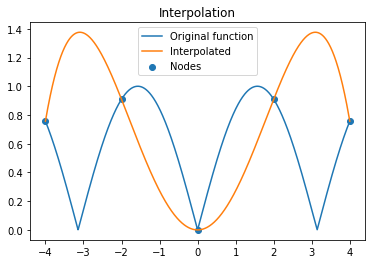

In [28]:
n=5
inter = Lagrange_interpolation(f, n)
plot_interpolation(f, inter, np.linspace(-4, 4, n), -4, 4)

### wielomiany 10-go stopnia 

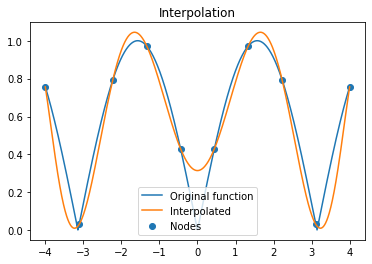

In [29]:
n=10
inter = Lagrange_interpolation(f, n)
plot_interpolation(f, inter, np.linspace(-4, 4, n), -4, 4)

### Dla wielomianów 10 stopnia funkcja interpolowana jest najbliższa oryginalnej

### Aby znaleźć liczbę punktów potrzebnych aby błąd interpolacji był mniejszy od $\varepsilon$ potrzbeujemy znalexć rozwiązanie nierówności:
$$ \frac{h^{n+1}}{4(n+1)} \max_{\xi \in (x_0, x_n)} |f^{n+1}(\xi)| < \varepsilon $$

### W naszym przypadku $ \varepsilon = 10^{-10} $

In [30]:
n = 1
while True:
    if upper_bound_equidistant(sin(x), n, -4, 4) <= 10 ** -10:
        print("aby błąd interpolacji byl mniejszy od 10 ** -10 potrzebujemy przynajmniej", 
              n, "węzłów interpolacji")
        break
    n += 1

aby błąd interpolacji byl mniejszy od 10 ** -10 potrzebujemy przynajmniej 11 węzłów interpolacji


# zadanie 4

#### Implementacja własnych funkcji służących do interpolacji

##### za pomocą jednomianów

In [31]:
def monomial_interpolation_own(points):
    n = len(points)
    matrix = np.zeros((n,n))

    for i in range(n):
        for j in range(n):
            matrix[i][j] = points[i][0] ** j

    val = np.array([p[1]  for p in points])
    res = np.linalg.solve(matrix, val)

    pol = 0
    for i in range (len(res)):
        pol += res[i] * x ** i

    return poly(pol)

##### za pomocą wielomianów Lagrange'a

In [32]:
def Lagrange_interpolation_own(points):
    x_values, y_values = [p[0] for p in points], [p[1] for p in points]

    n = len(points)

    res = 0

    for i in range(n):
        y = y_values[i]
        tmp = 1
        for j in range(n):
            if i == j:
                continue
            tmp *= (x - x_values[j]) / (x_values[i] - x_values[j])

        y *= tmp
        res += y

    return poly(res)

##### za pomocą wielomianów Newtona

In [33]:
def Newton_interpolation_own(points):
    x_values, y_values = [p[0] for p in points], [p[1] for p in points]

    n = len(points)
    matrix = np.zeros((n,n))

    for i in range(n):
        matrix[i][0] = y_values[i]

    for i in range(1,n):
        for j in range(i, n):
            matrix[j][i] = (matrix[j][i-1] - matrix[j-1][i-1]) / (x_values[j] - x_values[j - i])
    # print(matrix)
    newt = np.zeros(n)

    for i in range(n):
        newt[i] = matrix[i][i]

    res = newt[n-1]
    for i in range(n-2, -1, -1):
        res = res * (x - x_values[i]) + newt[i]

    return poly(res)

In [34]:
def plot_interpolation_for_points(points, polynomial):
    xlim = [min(points, key = lambda k:k[0])[0], max(points, key = lambda k:k[0])[0]]
    ylim = [min(points, key = lambda k:k[1])[1], max(points, key = lambda k:k[1])[1]]
    diff = xlim[1] - xlim[0]
    k = 0.2
    xlim[0] -= k * diff
    xlim[1] += k * diff
    
    diff = ylim[1] - ylim[0]
    ylim[0] -= k * diff
    ylim[1] += k * diff

    x = np.linspace(xlim[0], xlim[1])
    plt.plot(x, [polynomial(k) for k in x], label = "Interpolated")
    plt.scatter([p[0] for p in points], [p[1] for p in points], label = "Points")
    plt.legend()
    plt.show()

## Obliczenie wielomianów interpolujących dla zadanych punktów

In [35]:
points = [(0.5, 5.5), (1, 14.5), (1.5, 32.5), (2,62.5)]

In [36]:
monomial_interpolation_own(points)

Poly(4.0*x**3 + 6.0*x**2 + 2.0*x + 2.5, x, domain='RR')

In [37]:
Lagrange_interpolation_own(points)

Poly(3.99999999999999*x**3 + 6.00000000000003*x**2 + 2.0*x + 2.5, x, domain='RR')

In [38]:
Newton_interpolation_own(points)

Poly(4.0*x**3 + 6.0*x**2 + 2.0*x + 2.5, x, domain='RR')

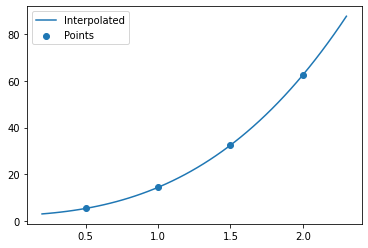

In [39]:
plot_interpolation_for_points(points, monomial_interpolation_own(points))

### Wzory uzyskane przez różne metody wyznacznia są takie same (jeśli pominiemy błędy przy reprezentacji liczb zmiennoprzecinkowych dla wielomianów Lagrange'a)

# zadanie 5

## Wyrażenie podanego wielomianu metodą Hornera

In [40]:
p = poly(3*x**3 - 7*x**2 +5*x -4, domain = 'RR')
p

Poly(3.0*x**3 - 7.0*x**2 + 5.0*x - 4.0, x, domain='RR')

In [41]:
coefs = p.all_coeffs()

def Horners_method(coefs):
    res = coefs[0]
    for i in range(1, len(coefs)):
        res = res * x + coefs[i]
    return res

Horners_method(coefs)

x*(x*(3.0*x - 7.0) + 5.0) - 4.0

# Zadanie 6

## Ile mnożeń należy wykonać do ewaluacji wielomianu $p(t)$ stopnia $n-1$ w danym punkcie $t$
### dla jednomianów wykonujemy $n$ mnożeń
### dla wielomianów Lagrange'a  $\ n\cdot (n-1) + n$, czyli $n^2$ mnożeń
### dla wielomianów Newton'a $\ n+ \sum_{k = 1}^{n}k = n + \frac12 (1 + n) \cdot n$, czyli $\frac{n\cdot (n+3)}{2}$ mnożeń